# Lista de Exercício 5
### Introdução ao Processamento Digital de Imagens (SEL0449/SEL5895)

**Instruções:**

 1. Esta lista consiste em 2 exercícios. O peso considerado para a nota final da lista está descrito ao lado do enunciado.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Não retirar os enunciados da lista.
 1. Depois de terminados os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado, o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0449-SEL5895_2023/blob/main/praticas/Lista_de_Exercicio_5.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/praticas/Lista_de_Exercicio_5.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: Bruno Paiva Sant'Anna`

`Número USP: 11819507`

### Introdução:

Nesta lista de exercícios vamos estudar sobre filtros aplicados no domínio da frequência. Primeiramente vamos importar as bibliotecas que iremos utilizar:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from mpl_toolkits import mplot3d

#### **Atenção**: os códigos abaixo são para fazer o download das imagens necessárias para a prática. EXECUTE-OS!

In [3]:
import urllib.request

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_05/towerbridge.tif?raw=true", "towerbridge.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_05/arvore_mod.tif?raw=true", "arvore_mod.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

### INTRODUÇÃO - Filtragem no domínio da frequência

A filtragem no domínio da frequência consiste em modificar a transformada de Fourier de uma imagem e depois calcular a transformada inversa para obter o resultado processado.

O grau de dificuldade na construção dos filtros diminui quando se trabalha no domínio da frequência, entretanto, a proximidade dos períodos na convolução pode causar o erro de wraparound (efeito de borda). Para solucionar esse problema, é necessário fazer um padding na imagem - lembrando que algoritmos DFT tendem a executar mais rapidamente arranjos de tamanho par, ou seja, normalmente se utiliza o dobro das dimensões M e N da imagem. As Figuras 1 e 2 ilustram os efeitos provocados, no borramento da imagem, tanto devido a não utilização de padding quanto da aplicação zero padding. 

Lembre-se que, afim de preservar informações sobre as bordas, normalmente utiliza-se do padding simétrico, e não o padding com zeros.


<center><img src="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_05/wraparound.PNG?raw=true" style="width:836px;height:266px;"></center>

<center><caption><b> Figura 1:</b> Periodicidade inerente às imagens 2D na utilização da DFT.</b></caption></center>
<caption><center> Referência: Gonzalez and Woods, Digital Image Processing 3rd.</center></caption></br>


<center><img src="https://github.com/LAVI-USP/SEL0449-SEL5895_2023/blob/main/imagens/pratica_05/wraparound_0.PNG?raw=true" style="width:836px;height:266px;"></center>

<center><caption><b> Figura 2:</b> Em b, resultado do borramento de a sem zero padding. Em c, resultado do borramento de a com zero padding. </b></caption></center>
<caption><center> Referência: Gonzalez and Woods, Digital Image Processing 3rd.</center></caption></br>

A função [np.fft.ff2](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html) - utilizada na lista anterior - oferece, por meio do parâmetro s, a opção de preenchimento (padding), sendo (Mf,Nf) normalmente igual a (2*M, 2*N) tal que M e N representam as dimensões da imagem. Para mais detalhes, consulte a documentação.

```python
f = np.fft.fft2(img,s=(Mf,Nf))
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift)+1.)
```

Atenção! Note as novas dimensões do espectro de frequência. Após a transformada inversa, será necessário recortar a imagem, resultando na imagem com as dimensões originais M e N, descartando as informações adjacentes.

### 1) Filtros PASSA-BAIXA E PASSA-ALTA no domínio da frequência (5.0/10.0)

Bordas e outras transições abruptas de intensidade (como o ruído) em uma imagem contribuem significativamente para o conteúdo de alta frequência de sua transformada de Fourier. Dessa forma, a suavização (borramento) é obtida no domínio da frequência pela atenuação das altas frequências - filtros passa-baixa.

Os filtros podem ser projetados de forma a apresentar transições mais abruptas ou mais suavizadas. Consideraremos apenas os filtros radialmente simétricos - deslocamento de fase zero - sendo D<sub>0</sub> o raio a partir da origem e n a ordem do filtro:
<p></br>

Filtro passa-baixa IDEAL:

$ H_{LPideal}(u,v) = 1,~se~D(u,v)~\le~D0$<br/>
$ H_{LPideal}(u,v) = 0,~se~D(u,v)~\gt~D0$<br/>

Filtro passa-baixa BUTTERWORTH:

$ H_{LPButterworth}(u,v) = \frac{1}{{1+\big[\frac{D(u,v)}{D_0}}\big]^{2n}}$<br/>

Filtro passa-baixa GAUSSIANO:

$ H_{LPGaussiano}(u,v) = e^{\frac{-D^2(u,v)}{2D_0^2}}$<br/>

Já o aguçamento das imagens pode ser obtido pela filtragem passa-alta, atenuando componentes de baixa frequência sem afetar as informações de alta frequência na transformada de Fourier. Os filtros passa-alta podem ser obtidos a partir dos respectivos passa-baixa, considerando a equação:

$ H_{HP}(u,v) = 1 - H_{LP}(u,v)$<br/>


**DICA:** para visualizar os filtros em plots 3D, você pode utilizar o toolkit já incluso na instalação da biblioteca matplotlib (incluso na importação inicial deste notebook). Para isto, é necessário manipular os dados do filtro, de forma que seja construída uma rede X-Y (contendo as coordenadas) em que serão plotadas as intensidades (Z). Considere um filtro de dimensões Mf e Nf e intensidades I. Para criar a rede, podemos utilizar o comando [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) tendo o 0 (zero) como valor inicial, Mf como valor final e com número de amostras equivalente a Mf. Da mesma forma com Nf.

A seguir, um exemplo de subplot utilizando a função plot_wireframe e plot_surface. Consulte o [link](https://matplotlib.org/stable/tutorials/toolkits/mplot3d.html) para mais detalhes.

```python
x = np.linspace(0, Mf, Mf)
y = np.linspace(0, Nf, Nf)

X, Y = np.meshgrid(x, y)
Z = I

fig = plt.figure(figsize = (20,10))
fig.suptitle('Filtros 3D')

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_wireframe(X,Y,Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_title('wireframe plot');

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=2, cstride=2,cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_title('surface plot');

plt.show()
```


**Exercício.** Considerando que a imagem 'towerbridge.tif' foi digitalizada com **resolução de 300DPI**, realize as seguintes tarefas: (5.0/10.0)

**a.** Visualize a imagem original e o espectro de Fourier (domínio da frequência). **Lembre-se do padding.**

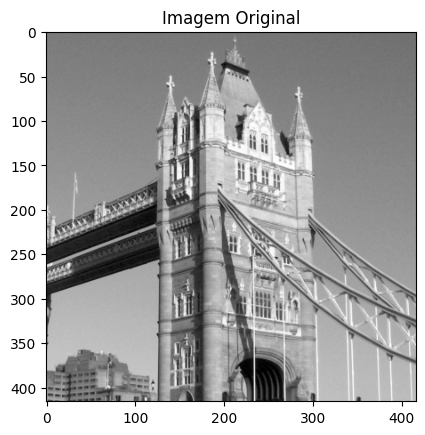

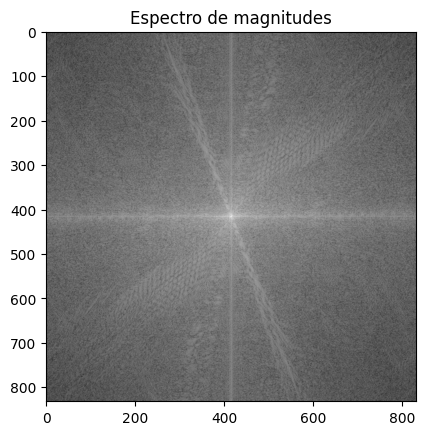

In [21]:
## -- Seu código começa AQUI -- ##
# Carregando a imagem
img1 = cv.imread('towerbridge.tif', cv.IMREAD_UNCHANGED)

# Mostrando a imagem original
plt.title('Imagem Original')
plt.imshow(img1, cmap='gray')
plt.show()

# Calculando a TF com zero padding
M,N = img1.shape
f1 = np.fft.fftshift(np.fft.fft2(img1, s = (2*M,2*N)))
f1_mag = 20*np.log(np.abs(f1)+1)

# Mostrando a TF
plt.title('Espectro de magnitudes')
plt.imshow(f1_mag, cmap='gray')
plt.show()

## -- Seu código termina AQUI -- ##


**b.** Crie um filtro **passa-baixa circular do tipo "Ideal"** com frequência de corte igual a 1,5 ciclos/mm. Aplicar à imagem e comentar o resultado. Mostre a imagem original, a magnitude do filtro criado, a imagem filtrada e o espectro de frequências filtrado.

<Figure size 1500x1500 with 0 Axes>

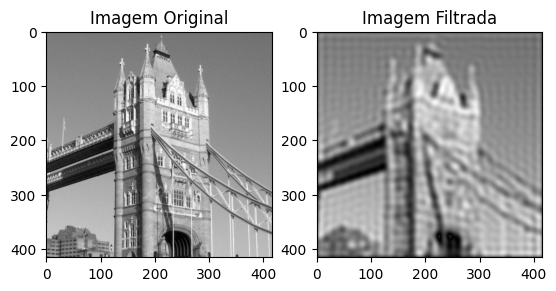

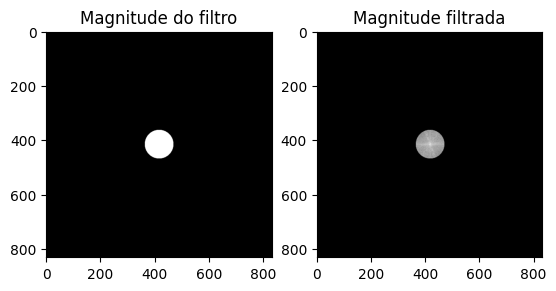

In [22]:
## -- Seu código começa AQUI -- ##
# Calculando D0
DPI = 300
CPM = 1.5

delta_x = 25.4/DPI
delta_u = 1/(M*delta_x)
D0 = CPM/delta_u

# Encontrando o centro da imagem
cx = M
cy = N

# Implementando o filtro
ideal_lp = np.zeros((2*M, 2*N))

for x in range(2*M):
    for y in range(2*N):
        dist = np.sqrt((x-cx)**2 + (y-cy)**2)

        if dist<D0:
            ideal_lp[x,y] = 1

# Aplicando o filtro
f1_ideal_lp = ideal_lp*f1
mag_f1_ideal_lp = 20*np.log(np.abs(f1_ideal_lp)+1)

# Trazendo de volta a imagem para o espaço
img1_ideal_lp = np.abs(np.fft.ifft2(np.fft.ifftshift(f1_ideal_lp)))

# Cortando a imagem para ter seu tamanho original
img1_ideal_lp = img1_ideal_lp[0:M,0:N]

# Mostrando os resultados
plt.figure(figsize=(15, 15))

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(img1, cmap='gray')
ax1.set_title('Imagem Original')
ax2.imshow(img1_ideal_lp, cmap='gray')
ax2.set_title('Imagem Filtrada')
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(ideal_lp, cmap='gray')
ax1.set_title('Magnitude do filtro')
ax2.imshow(mag_f1_ideal_lp, cmap='gray')
ax2.set_title('Magnitude filtrada')
plt.show()

## -- Seu código termina AQUI -- ##

**c.** Crie um filtro **passa-baixa circular do tipo "Butterworth"** com n=2 e frequência de corte igual a 1,5 ciclos/mm. Aplicar à imagem e comentar o resultado.  Mostre a imagem original, a magnitude do filtro criado, a imagem filtrada e o espectro de frequências filtrado.

<Figure size 1500x1500 with 0 Axes>

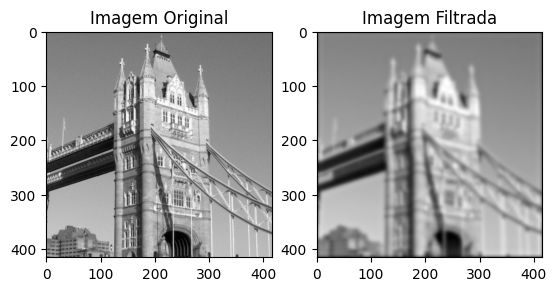

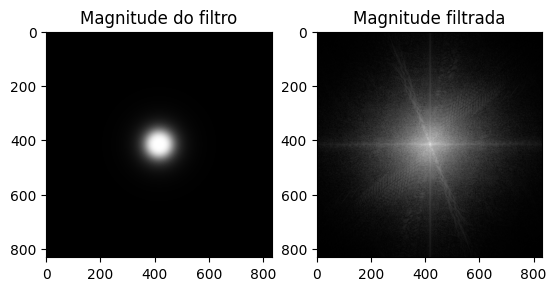

In [24]:
## -- Seu código começa AQUI -- ##
# Implementando o filtro
bw_lp = np.zeros((2*M, 2*N))
n = 2

for x in range(2*M):
    for y in range(2*N):
        dist = np.sqrt((x-cx)**2 + (y-cy)**2)
        bw_lp[x,y] = 1/(1+np.power(dist/D0, 2*n))

# Aplicando o filtro
f1_bw_lp = bw_lp*f1
mag_f1_bw_lp = 20*np.log(np.abs(f1_bw_lp)+1)

# Trazendo de volta a imagem para o espaço
img1_bw_lp = np.abs(np.fft.ifft2(np.fft.ifftshift(f1_bw_lp)))

# Cortando a imagem para ter seu tamanho original
img1_bw_lp = img1_bw_lp[0:M,0:N]

# Mostrando os resultados
plt.figure(figsize=(15, 15))

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(img1, cmap='gray')
ax1.set_title('Imagem Original')
ax2.imshow(img1_bw_lp, cmap='gray')
ax2.set_title('Imagem Filtrada')
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(bw_lp, cmap='gray')
ax1.set_title('Magnitude do filtro')
ax2.imshow(mag_f1_bw_lp, cmap='gray')
ax2.set_title('Magnitude filtrada')
plt.show()

## -- Seu código termina AQUI -- ##

**d.** Crie um filtro **passa-baixa circular do tipo "Gaussiano"** com frequência de corte igual a 1,5 ciclos/mm. Aplicar à imagem e comentar o resultado.  Mostre a imagem original, a magnitude do filtro criado, a imagem filtrada e o espectro de frequências filtrado.

<Figure size 1500x1500 with 0 Axes>

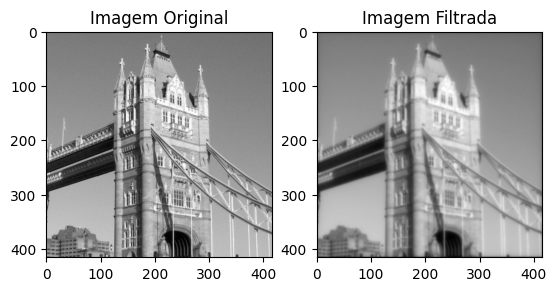

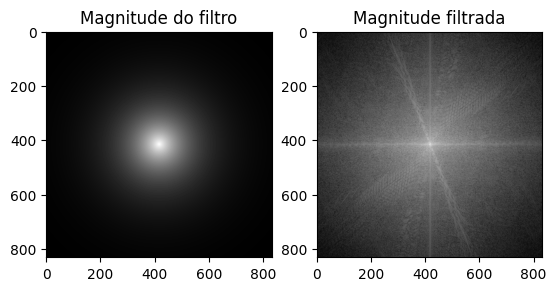

In [25]:
## -- Seu código começa AQUI -- ##
# Implementando o filtro
gauss_lp = np.zeros((2*M, 2*N))

for x in range(2*M):
    for y in range(2*N):
        dist = np.sqrt((x-cx)**2 + (y-cy)**2)
        gauss_lp[x,y] = np.exp(-dist/(2*D0))

# Aplicando o filtro
f1_gauss_lp = gauss_lp*f1
mag_f1_gauss_lp = 20*np.log(np.abs(f1_gauss_lp)+1)

# Trazendo de volta a imagem para o espaço
img1_gauss_lp = np.abs(np.fft.ifft2(np.fft.ifftshift(f1_gauss_lp)))

# Cortando a imagem para ter seu tamanho original
img1_gauss_lp = img1_gauss_lp[0:M,0:N]

# Mostrando os resultados
plt.figure(figsize=(15, 15))

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(img1, cmap='gray')
ax1.set_title('Imagem Original')
ax2.imshow(img1_gauss_lp, cmap='gray')
ax2.set_title('Imagem Filtrada')
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(gauss_lp, cmap='gray')
ax1.set_title('Magnitude do filtro')
ax2.imshow(mag_f1_gauss_lp, cmap='gray')
ax2.set_title('Magnitude filtrada')
plt.show()

## -- Seu código termina AQUI -- ##

**e.** Crie os **filtros passa-alta** com as mesmas frequências de corte e características especificadas em b, c e d. Em cada um, mostre a imagem original, a magnitude do filtro criado, a imagem filtrada e o espectro de frequências filtrado.

<Figure size 1500x1500 with 0 Axes>

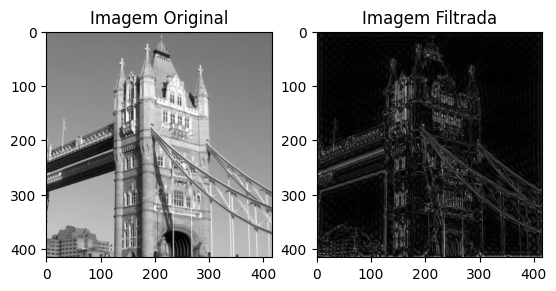

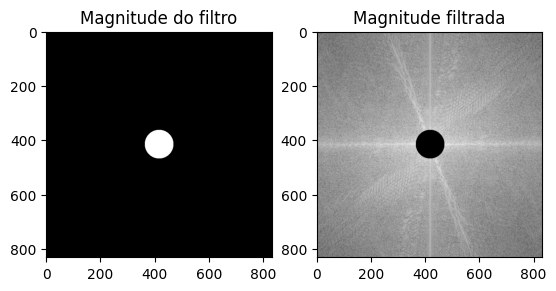

In [26]:
## -- Seu código começa AQUI -- ##
# Definindo o filtro
ideal_hp = 1 - ideal_lp

# Aplicando o filtro
f1_ideal_hp = ideal_hp*f1
mag_f1_ideal_hp = 20*np.log(np.abs(f1_ideal_hp)+1)

# Trazendo de volta a imagem para o espaço
img1_ideal_hp = np.abs(np.fft.ifft2(np.fft.ifftshift(f1_ideal_hp)))

# Cortando a imagem para ter seu tamanho original
img1_ideal_hp = img1_ideal_hp[0:M,0:N]

# Mostrando os resultados
plt.figure(figsize=(15, 15))

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(img1, cmap='gray')
ax1.set_title('Imagem Original')
ax2.imshow(img1_ideal_hp, cmap='gray')
ax2.set_title('Imagem Filtrada')
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(ideal_lp, cmap='gray')
ax1.set_title('Magnitude do filtro')
ax2.imshow(mag_f1_ideal_hp, cmap='gray')
ax2.set_title('Magnitude filtrada')
plt.show()

## -- Seu código termina AQUI -- ##

<Figure size 1500x1500 with 0 Axes>

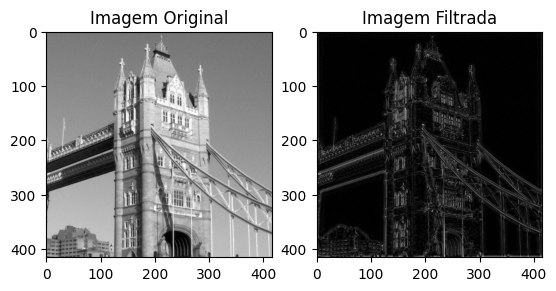

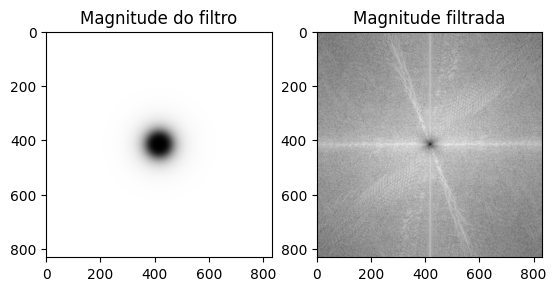

In [27]:
## -- Seu código começa AQUI -- ##
# Implementando o filtro
bw_hp = 1 - bw_lp
# Aplicando o filtro
f1_bw_hp = bw_hp*f1
mag_f1_bw_hp = 20*np.log(np.abs(f1_bw_hp)+1)

# Trazendo de volta a imagem para o espaço
img1_bw_hp = np.abs(np.fft.ifft2(np.fft.ifftshift(f1_bw_hp)))

# Cortando a imagem para ter seu tamanho original
img1_bw_hp = img1_bw_hp[0:M,0:N]

# Mostrando os resultados
plt.figure(figsize=(15, 15))

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(img1, cmap='gray')
ax1.set_title('Imagem Original')
ax2.imshow(img1_bw_hp, cmap='gray')
ax2.set_title('Imagem Filtrada')
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(bw_hp, cmap='gray')
ax1.set_title('Magnitude do filtro')
ax2.imshow(mag_f1_bw_hp, cmap='gray')
ax2.set_title('Magnitude filtrada')
plt.show()

## -- Seu código termina AQUI -- ##

<Figure size 1500x1500 with 0 Axes>

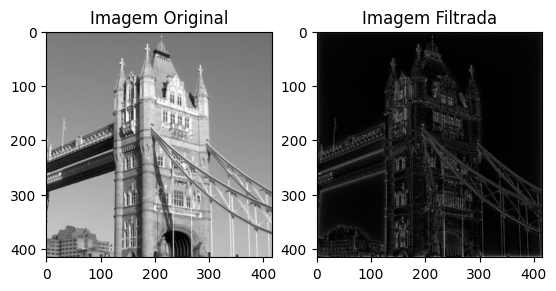

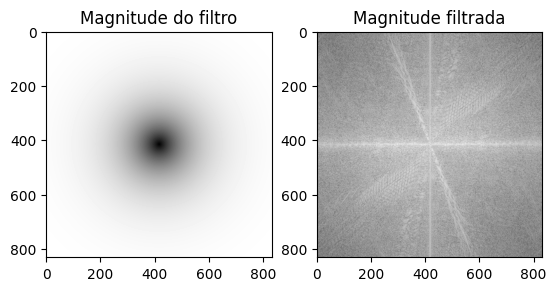

In [28]:
## -- Seu código começa AQUI -- ##
# Implementando o filtro
gauss_hp = 1 - gauss_lp
# Aplicando o filtro
f1_gauss_hp = gauss_hp*f1
mag_f1_gauss_hp = 20*np.log(np.abs(f1_gauss_hp)+1)

# Trazendo de volta a imagem para o espaço
img1_gauss_hp = np.abs(np.fft.ifft2(np.fft.ifftshift(f1_gauss_hp)))

# Cortando a imagem para ter seu tamanho original
img1_gauss_hp = img1_gauss_hp[0:M,0:N]

# Mostrando os resultados
plt.figure(figsize=(15, 15))

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(img1, cmap='gray')
ax1.set_title('Imagem Original')
ax2.imshow(img1_gauss_hp, cmap='gray')
ax2.set_title('Imagem Filtrada')
plt.show()


fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(gauss_hp, cmap='gray')
ax1.set_title('Magnitude do filtro')
ax2.imshow(mag_f1_gauss_hp, cmap='gray')
ax2.set_title('Magnitude filtrada')
plt.show()

## -- Seu código termina AQUI -- ##

In [10]:
# COMENTÁRIOS:
# O filtro ideal, por ter tansições abruptas, cria efeitos indesejados de ondulações na imagem filtrada. 
# Os filtros Butterworth, por terem uma ordem não muito alta, não causaram distorçção na imagem, mas a borraram
# bastante, diferentemente do filtro Gaussiano,que é o mais suave dos 3.

**f.** Visualize os filtros PASSA-BAIXA e PASSA-ALTA criados (nos itens acima) em plots 3D (Wireframe e Surface).

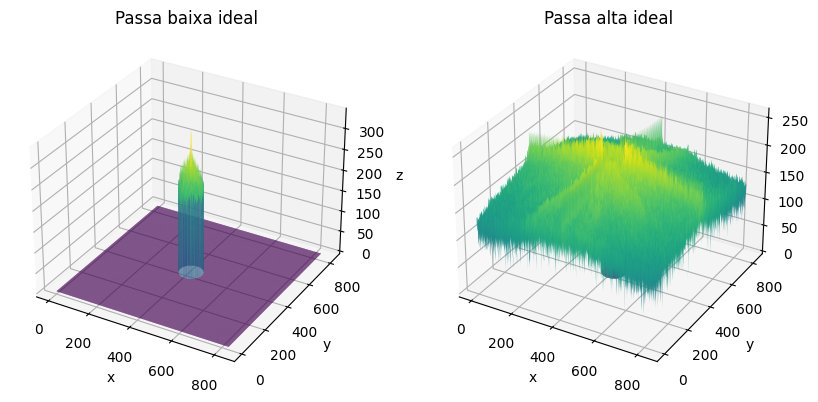

In [35]:
## FILTROS IDEAIS
## -- Seu código começa AQUI -- ##
x = np.linspace(0, 2*M, 2*M)
y = np.linspace(0, 2*N, 2*N)

X, Y = np.meshgrid(x, y)
Z_lp = mag_f1_ideal_lp
Z_hp = mag_f1_ideal_hp

fig = plt.figure(figsize = (10,5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z_lp, rstride=2, cstride=2,cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_title('Passa baixa ideal');

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z_hp, rstride=2, cstride=2,cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_title('Passa alta ideal');

plt.show()
## -- Seu código termina AQUI -- ##

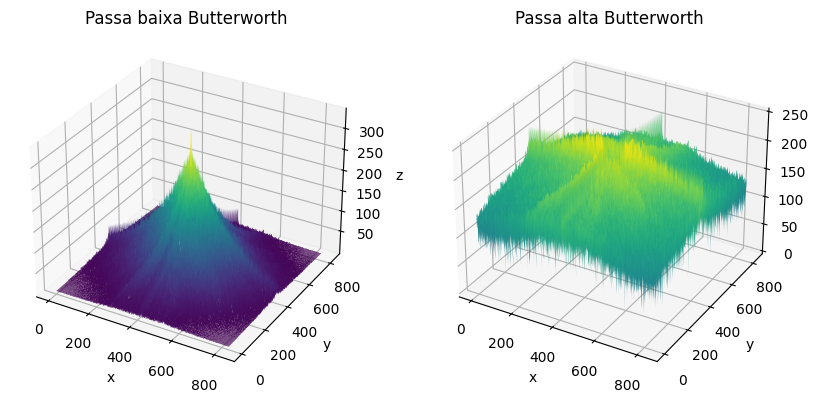

In [39]:
## FILTROS BUTTERWORTH
## -- Seu código começa AQUI -- ##
Z_lp = mag_f1_bw_lp
Z_hp = mag_f1_bw_hp

fig = plt.figure(figsize = (10,5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z_lp, rstride=2, cstride=2,cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_title('Passa baixa Butterworth');

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z_hp, rstride=2, cstride=2,cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_title('Passa alta Butterworth');

plt.show()
## -- Seu código termina AQUI -- ##

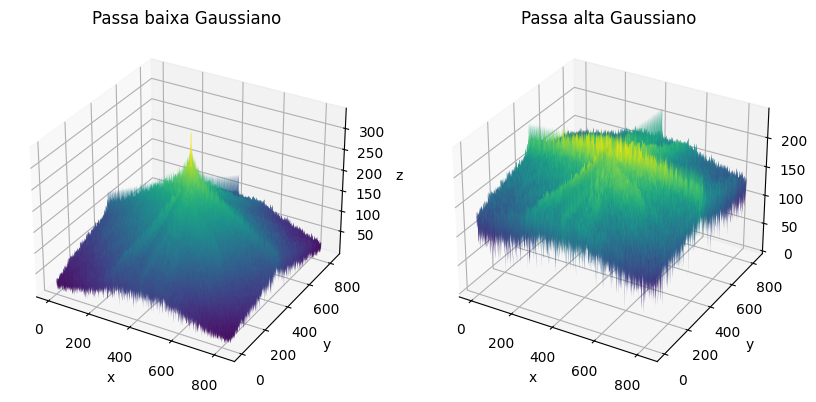

In [38]:
## FILTROS GAUSSIANO
## -- Seu código começa AQUI -- ##
Z_lp = mag_f1_gauss_lp
Z_hp = mag_f1_gauss_hp

fig = plt.figure(figsize = (10,5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z_lp, rstride=2, cstride=2,cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_title('Passa baixa Gaussiano');

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z_hp, rstride=2, cstride=2,cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_title('Passa alta Gaussiano');

plt.show()
## -- Seu código termina AQUI -- ##

### 2) Filtros PASSA-BANDA E REJEITA-BANDA no domínio da frequência (5.0/10.0)

Existem algumas aplicações nas quais é interessante processar bandas específicas de frequências. Para tanto, utiliza-se filtros conhecidos como filtros rejeita-banda e passa-banda. Assim como mostrado anteriormente, a transição pode ser feita de modo abrupto ou suavizado. As equações a seguir referem-se a filtros rejeita-banda (BR de *bandreject*):

Filtro rejeita-baixa IDEAL:

$ H_{BRideal}(u,v) = 0, \;se\;D_0 - \frac{W}{2} \le D \le D_0 + \frac{W}{2}$<br/>
$ H_{BRideal}(u,v) = 1,\; para\;todos\;outros\;casos$<br/>

Filtro rejeita-baixa BUTTERWORTH:

$ H_{BRButterworth}(u,v) = \frac{1}{1+\big[\frac{D \cdot W}{D^2-D_0^2}\big]^{2n}}$<br/>

Filtro rejeita-baixa GAUSSIANO:

$ H_{BRGaussiano}(u,v) = 1-e^{-\big(\frac{D^2-D_0^2}{D \cdot W}\big)^2}$<br/>


Um filtro passa-banda (BP de *bandpass*) é obtido a partir do respectivo rejeita-banda, conforme equação abaixo:

$ H_{BP}(u,v) = 1 - H_{BR}(u,v)$<br/>



**Exercício.** Considerando que a imagem 'arvore_mod.tif' foi digitalizada com **resolução de 400DPI**, realize as seguintes tarefas: (5.0/10.0)

**a.** Visualize a imagem original e o espectro de Fourier (domínio da frequência). **Lembre-se do padding.**

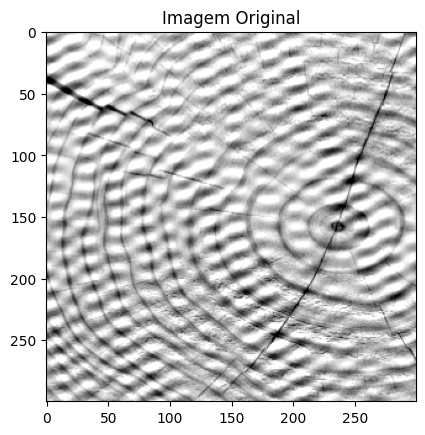

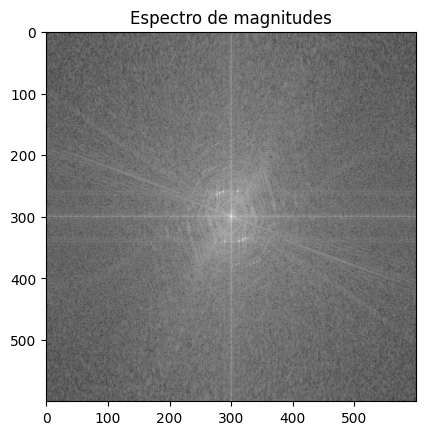

In [42]:
## -- Seu código começa AQUI -- ##
# Carregando a imagem
img2 = cv.imread('arvore_mod.tif', cv.IMREAD_UNCHANGED)

# Mostrando a imagem original
plt.title('Imagem Original')
plt.imshow(img2, cmap='gray')
plt.show()

# Calculando a TF com zero padding
M,N = img2.shape
f2 = np.fft.fftshift(np.fft.fft2(img2, s = (2*M,2*N)))
f2_mag = 20*np.log(np.abs(f2)+1)

# Mostrando a TF
plt.title('Espectro de magnitudes')
plt.imshow(f2_mag, cmap='gray')
plt.show()

## -- Seu código termina AQUI -- ##

**b.** Encontre o centro do espectro de frequências. Plote um recorte central. Encontre o tamanho de recorte que permita melhor visualização dos pontos mais evidentes simétricos em relação ao centro.

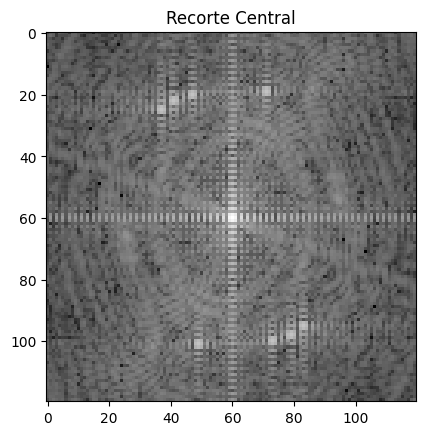

In [51]:
## -- Seu código começa AQUI -- ##
# Encontrando o centro
c2x = M
c2y = N

# Fazendo o recorte
delta_f = 60

recorte = f2_mag[M-delta_f:M+delta_f, N-delta_f:N+delta_f]

# Mostrando o recorte
plt.title('Recorte Central')
plt.imshow(recorte, cmap='gray')
plt.show()

## -- Seu código termina AQUI -- ##


**c.** Crie um **filtro rejeita-banda circular do tipo "ideal"** para ser aplicado à imagem. Os parâmetros de frequência de corte em ciclos/mm e a largura de banda em ciclos/mm devem ser escolhidos preservando ao máximo o conteúdo da imagem. Utilize a referência do exercício "b" para auxiliar na escolha dos parâmetros e comente justificando.

Crie um **filtro passa-banda circular do tipo "ideal"** com os mesmos parâmetros de frequência de corte para visualizar as componentes removidas.

Comente o resultado obtido.

<Figure size 1500x1500 with 0 Axes>

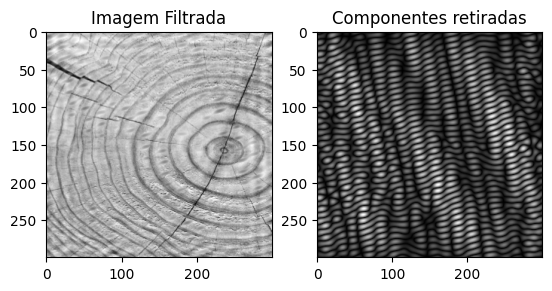

In [62]:
## -- Seu código começa AQUI -- ##
# Definindo D0 e W
D0 = 40
W = 10

# Implementando o filtro
ideal_br = np.ones((2*M, 2*N))
ideal_bp = np.zeros((2*M, 2*N))

for x in range(2*M):
    for y in range(2*N):
        dist = np.sqrt((x-c2x)**2 + (y-c2y)**2)

        if D0+W/2>dist and dist>D0-W/2:
            ideal_br[x,y] = 0
            ideal_bp[x,y] = 1

# Aplicando os filtros
f2_ideal_br = ideal_br*f2
mag_f2_ideal_br = 20*np.log(np.abs(f2_ideal_br)+1)

f2_ideal_bp = ideal_bp*f2
mag_f2_ideal_bp = 20*np.log(np.abs(f2_ideal_bp)+1)

# Trazendo de volta as imagens para o espaço
img2_ideal_br = np.abs(np.fft.ifft2(np.fft.ifftshift(f2_ideal_br)))
img2_ideal_bp = np.abs(np.fft.ifft2(np.fft.ifftshift(f2_ideal_bp)))

# Cortando as imagens para ter seu tamanho original
img2_ideal_br = img2_ideal_br[0:M,0:N]
img2_ideal_bp = img2_ideal_bp[0:M,0:N]

# Mostrando os resultados
plt.figure(figsize=(15, 15))

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(img2_ideal_br, cmap='gray')
ax1.set_title('Imagem Filtrada')
ax2.imshow(img2_ideal_bp, cmap='gray')
ax2.set_title('Componentes retiradas')
plt.show()

## -- Seu código termina AQUI -- ##

# Comentários: 
# Pelo recorte obtido no item anterior, percebeu-se que a distância entre as componentes de maior nível 
# (que representa as ondulações indesejadas) e o centro era de 40. Desse modo, foram definidos D0 e W 
# de forma a retirar esses pontos. Observa-se, pela imagem obtida, que a ondulação indesejada foi retirada
#  e que a imagem está mais próxima da realidade.

**d.** Visualize os filtros PASSA-BANDA e REJEITA-BANDA criados em plots 3D (Wireframe e Surface).

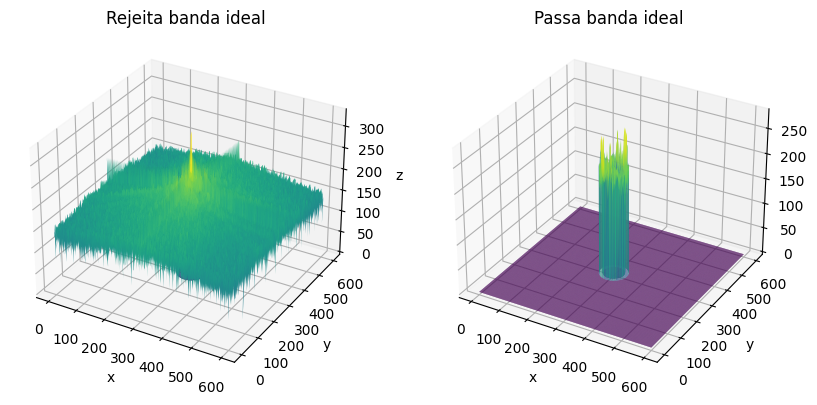

In [64]:
## FILTROS IDEAIS
## -- Seu código começa AQUI -- ##
x = np.linspace(0, 2*M, 2*M)
y = np.linspace(0, 2*N, 2*N)

X, Y = np.meshgrid(x, y)
Z_br = mag_f2_ideal_br
Z_bp = mag_f2_ideal_bp

fig = plt.figure(figsize = (10,5))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z_br, rstride=2, cstride=2,cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_title('Rejeita banda ideal');

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X, Y, Z_bp, rstride=2, cstride=2,cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_title('Passa banda ideal');

plt.show()
## -- Seu código termina AQUI -- ##